### Imports: 

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

### loading dataset:
#### Description: Loads the Fashion-MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
((X_images_training, y_identifications_training), (X_images_test, y_identifications_test)) = dataset.load_data()

### Exploring the data:

In [4]:
X_images_training.shape

(60000, 28, 28)

In [5]:
y_identifications_training.shape

(60000,)

In [6]:
X_images_test.shape

(10000, 28, 28)

In [7]:
y_identifications_test.shape

(10000,)

In [8]:
y_identifications_training.min()

0

In [9]:
y_identifications_training.max()

9

In [10]:
classifiers_total = 10

### Viewing the data: 

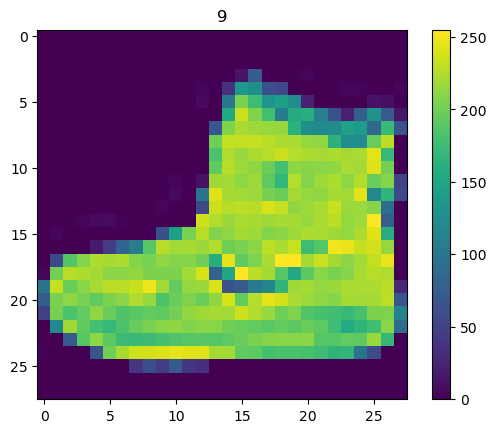

In [11]:
plt.imshow(X_images_training[0])
plt.title(y_identifications_training[0])
plt.colorbar()
plt.show()

In [12]:
classifiers_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

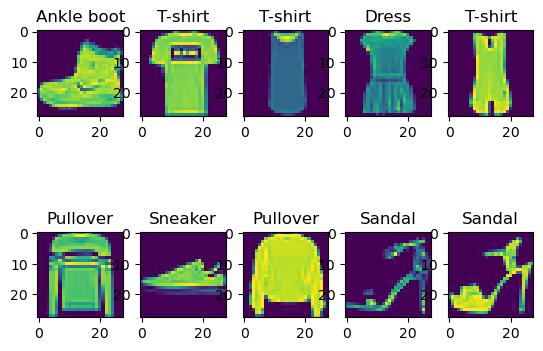

In [13]:
for image in range(0, 10):
    plt.subplot(2, 5, image+1)
    plt.imshow(X_images_training[image])
    plt.title(classifiers_name[y_identifications_training[image]])

### Normalizing the data

In [14]:
X_images_training = X_images_training/float(255)
X_images_test = X_images_test/float(255)

## Training:
### Creating, compiling, training and normalizing the model with dropout.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
history = model.fit(X_images_training, y_identifications_training, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5260 - accuracy: 0.8151 - val_loss: 0.3985 - val_accuracy: 0.8570
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.8544 - val_loss: 0.3977 - val_accuracy: 0.8553
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3618 - accuracy: 0.8665 - val_loss: 0.3626 - val_accuracy: 0.8667
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3407 - accuracy: 0.8750 - val_loss: 0.3422 - val_accuracy: 0.8767
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3245 - accuracy: 0.8798 - val_loss: 0.3267 - val_accuracy: 0.8843


### Visualizing training and validation:

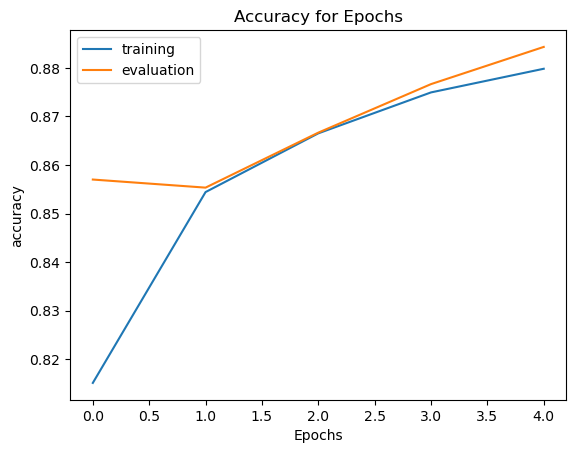

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

### Visualizing losses and validation:

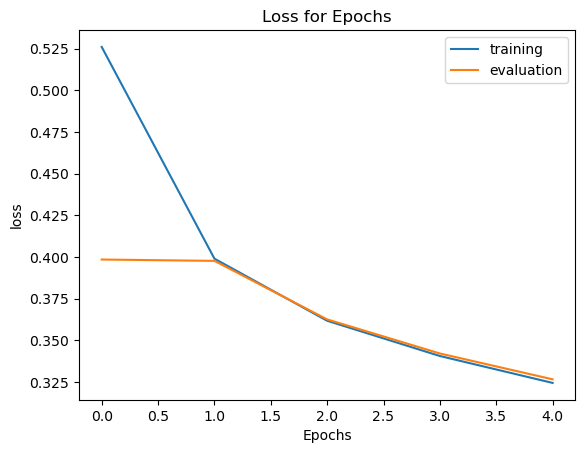

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()

#### Test 

In [18]:
test_model = model.predict(X_images_test)
np.argmax(test_model[0])

313/313 [==============================] - 0s 1ms/step


9

#### Real answer

In [19]:
y_identifications_test[0]

9

### Evaluating the model with the  test base (X_test and y_test):

In [20]:
model.evaluate(X_images_test, y_identifications_test)
test_loss, test_accuracy = model.evaluate(X_images_test, y_identifications_test)
print('\n')
print(f'Loss: {test_loss}')
print('\n')
print(f'Accuracy: {test_accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8738


Loss: 0.3530295789241791


Accuracy: 0.8737999796867371


## Salving training model:

In [21]:
model.save('model.keras')

In [22]:
model_salve = load_model('model.keras')

### Testing the saved model:

In [23]:
test_model = model_salve.predict(X_images_test)
np.argmax(test_model[0])

313/313 [==============================] - 0s 1ms/step


9

### Real answer:

In [24]:
y_identifications_test[0]

9